In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as plt

filename = "fish1.txt"

time_weight_bait_data = pd.read_csv(filename, sep = " ", header = None, index_col = None)

time_weight_bait_data.shape


(400, 3)

In [4]:
time_weight_bait_data.columns = ["X","Y","Z"]
time_weight_bait_data.head(5) 

,X,Y,Z
0,15.25,2.40,B
1,7.43,1.66,C
2,7.17,2.75,C
3,2.93,1.21,A
4,11.07,0.39,C


In [5]:
time_weight_bait_data.sample(5) 

,X,Y,Z
207,7.67,1.91,C
26,8.96,1.56,A
141,5.00,0.34,C
183,18.48,1.07,C
55,18.26,0.67,B


array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>]], dtype=object)

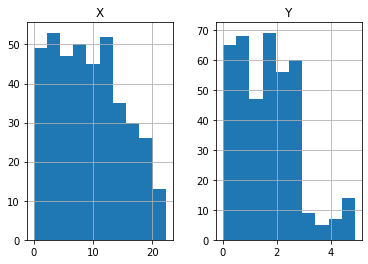

In [5]:
time_weight_bait_data.hist() 

In [6]:
from pandas import DataFrame
bait = pd.read_csv(filename, sep = " ", header = None)
print(bait)

         0     1  2
0    15.25  2.40  B
1     7.43  1.66  C
2     7.17  2.75  C
3     2.93  1.21  A
4    11.07  0.39  C
..     ...   ... ..
395   8.34  0.83  A
396  14.37  2.67  C
397   2.63  3.55  C
398   7.28  1.05  A
399  12.38  0.87  C

[400 rows x 3 columns]


array([[<AxesSubplot:title={'center':'X'}>]], dtype=object)

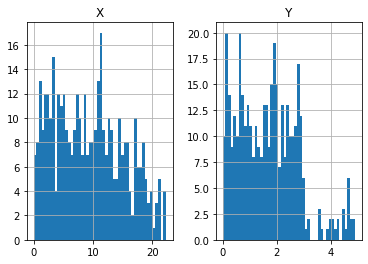

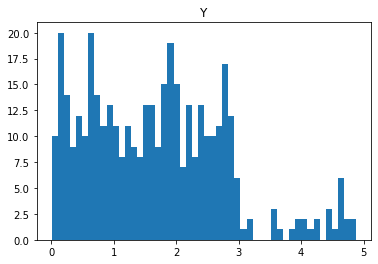

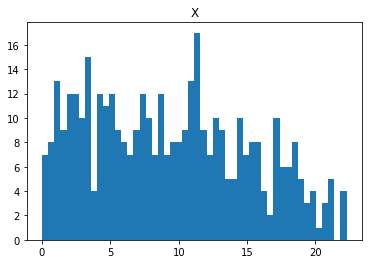

In [7]:
#specify the column size weight (if named), hide grid, set bins to 50
time_weight_bait_data.hist(bins = 50) 
time_weight_bait_data.hist(column = "Y", grid = False, bins = 50) 
time_weight_bait_data.hist(column = "X", grid = False, bins = 50) 

In [8]:
time_weight_bait_data.describe()

,X,Y
count,400.000000,400.00000
mean,9.370525,1.66740
std,5.796400,1.10816
min,0.010000,0.01000
25%,4.325000,0.70750
50%,9.020000,1.61500
75%,13.747500,2.40000
max,22.270000,4.88000


In [9]:
#Additionally calculate the skewness偏度 and kurtosis峰度 for each column
time_weight_bait_data.skew()

X    0.266856
Y    0.653793
dtype: float64

In [10]:
time_weight_bait_data.kurtosis()

X   -0.946594
Y    0.161891
dtype: float64

In [11]:
time_weight_bait_data["Y"].min()


0.01

In [12]:
time_weight_bait_data["Y"].max()

4.88

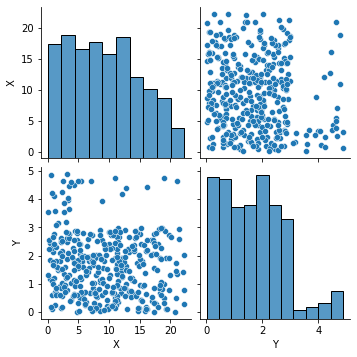

In [13]:
import seaborn as sns #For Visualization
sns.pairplot(time_weight_bait_data)

<AxesSubplot:xlabel='Y', ylabel='X'>

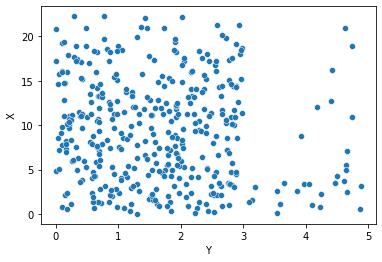

In [14]:
#Run the Scatter of Weight vs. Time on framework
sns.scatterplot(x = "Y", y = "X", data = time_weight_bait_data)

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


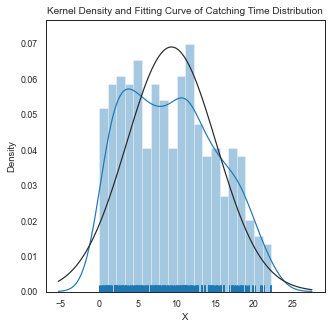

In [153]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (5,5))
sns.distplot(time_weight_bait_data["X"],fit = norm,bins = 20, rug = True)
ax.set_title("Kernel Density and Fitting Curve of Catching Time Distribution",
            size = 10)
plt.savefig("Kernel Density and Fitting Curve of Catching Time Distribution")

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


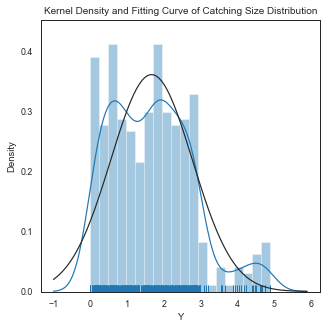

In [154]:
fig,ax = plt.subplots(figsize = (5,5))
sns.distplot(time_weight_bait_data["Y"], fit = norm,bins = 20, rug = True)
ax.set_title("Kernel Density and Fitting Curve of Catching Size Distribution",
            size = 10)
plt.savefig("Kernel Density and Fitting Curve of Catching Size Distribution")

In [38]:
#Create a new markdown cell below and write a summary of your findings from the plots above

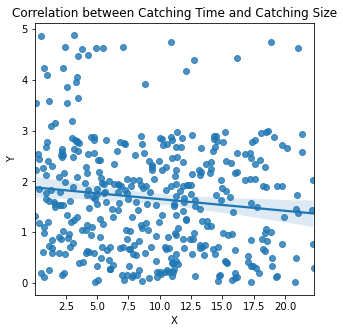

In [42]:
#Create a regplot to figure out the correlation
#It's your choice to choose the methodology for correlation calculation
#And it would be better to include your reason for your choice
fig,ax = plt.subplots(figsize = (5,5))
ax.set_ylabel("Catching Size")
ax.set_xlabel("Catching Time")
ax.set_title("Correlation between Catching Time and Catching Size")
sns.regplot(x = "X", y = "Y", data = time_weight_bait_data)
plt.savefig("Correlation between Catching Time and Catching Size.png")

In [69]:
from scipy import stats
import scipy.stats as sci
#Use thre pearsonr method to find the correlation details
#Is it positive or negative
#Is it statistically significant
stats.pearsonr(time_weight_bait_data["X"],time_weight_bait_data["Y"])

(-0.12059298863990137, 0.015816415118020677)

In [70]:
#Define a named function that calculates the R-squared
def r2(x,y):
    return stats.pearsonr(x,y)[0]**2

C:\Users\asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:2094: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


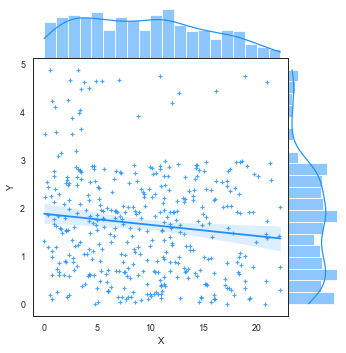

In [159]:
#Experiment with other functions likr jointplot
#'kind' parameter marks the type of charts to plot
# Are there other kind of chats to use

ax.set_title("Correlation between Catching Time and Catching Size")

sns.jointplot(x = "X", y = "Y", 
              data=time_weight_bait_data, 
              xlim = [-1,23],
              color = 'dodgerblue',
              marker = "+",
              kind="reg",
              space = 0,
              size = 5,
              marginal_kws = dict(bins=20, rug =True)
              )
plt.savefig("Correlation between Catching Time and Catching Size2.png")

In [160]:
# Add titles to your charts
# Try to use color to seperate different variables
# Explain the results you get from both charts or statistic information

C:\Users\asus\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


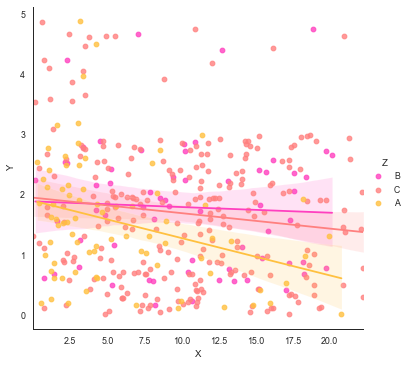

In [149]:
ax.set_title("lalala")
sns.set_style("white")
sns.lmplot(x="X", y="Y", hue="Z", data=time_weight_bait_data, palette="spring", size = 5,
         )
plt.savefig("Correlation between XYZ")

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'